Twitter Algorithm

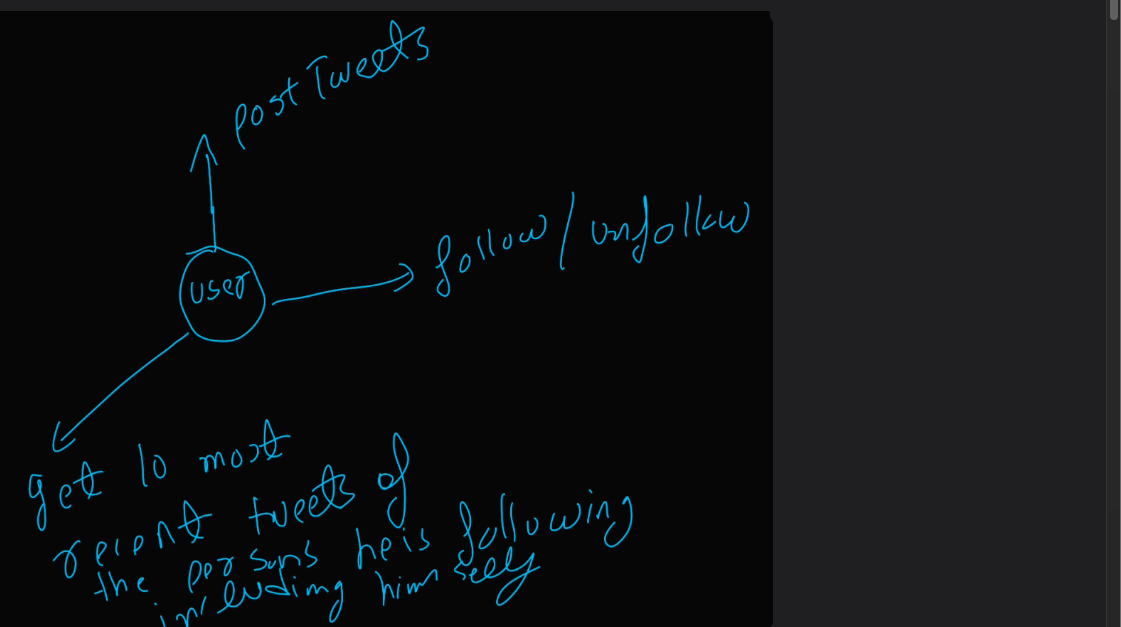

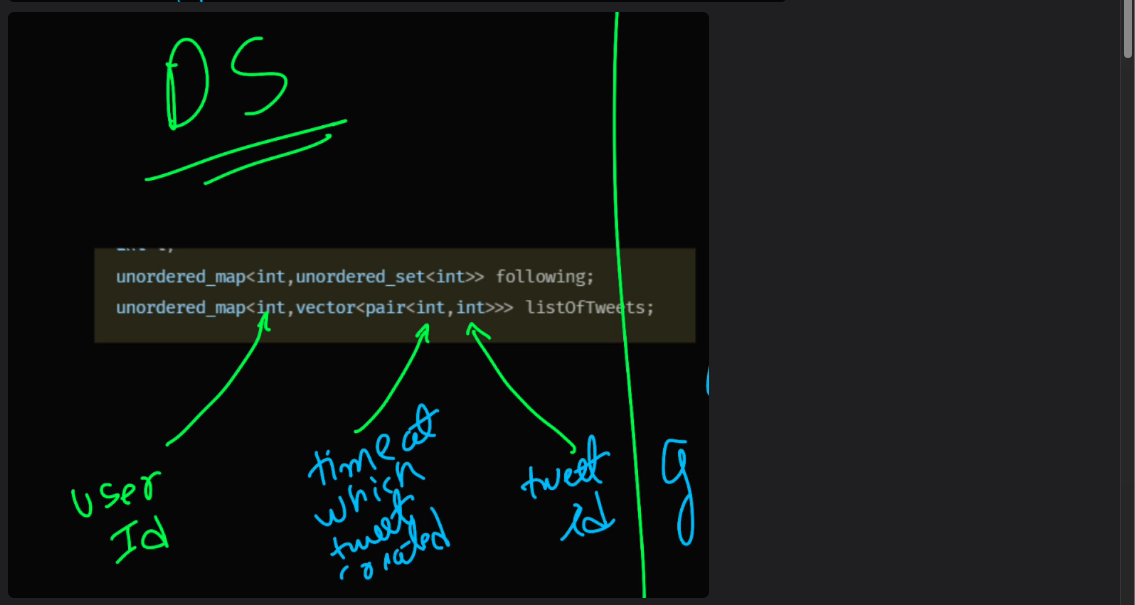

In [ ]:
class Twitter {
    public:
        Twitter() {
            
        }
        
        void postTweet(int userId, int tweetId) {
            
        }
        
        vector<int> getNewsFeed(int userId) {
            
        }
        
        void follow(int followerId, int followeeId) {
            
        }
        
        void unfollow(int followerId, int followeeId) {
            
        }
    };
    

In [ ]:
class Twitter {
    int t;
    unordered_map<int,unordered_set<int>> following;
    unordered_map<int,vector<vector<int>>> listOfTweets;
    //{userId,{time, tweetId}}
    vector<int> alg(vector<vector<vector<int>>> &ma, int k){
        vector<int> ans;
        int rr=ma.size();
        vector<vector<int>> tmp;
        for(int r=0;r<rr;r++){
            if(ma[r].size()){
                tmp.push_back({r,(int)ma[r].size()-1});        
            }
        } 

        auto cmp=[&](vector<int> &a, vector<int> &b){
            auto x=ma[a[0]][a[1]],y=ma[b[0]][b[1]];
            return x[0]<y[0];
        };
        priority_queue<vector<int> ,vector<vector<int>>,decltype(cmp)> pq(cmp,tmp);
        while(!pq.empty() and k--){
            auto vv=pq.top();
            pq.pop();
            int r=vv[0],c=vv[1];
            ans.push_back(ma[r][c][1]);
            if(c-1>=0) pq.push({r,c-1});
        }
        
        return ans;
    }

    vector<int> api2(vector<int> &person2Track){
        //get all the tweets of all the persons of which we have to track listOfTweets
        vector<vector<vector<int>>> ma;
        for(int id: person2Track){
            ma.push_back(listOfTweets[id]);
        }
        //ma is individually row wise sorted
        return alg(ma,10);
    }

    vector<int> api1(int userId){
        //get all the persons of which we have to track listOfTweets

        vector<int> tmp;
        //own
        tmp.push_back(userId);
        //following
        for(auto id: following[userId]){
            tmp.push_back(id);
        } 
        //tmp is populated with all the persons of which we have to track listOfTweets
        return api2(tmp);
    }

public:
    Twitter() {
        t=0;
    }
    
    void postTweet(int userId, int tweetId) {
        listOfTweets[userId].push_back({++t,tweetId});
    }
    
    vector<int> getNewsFeed(int userId) {
        return api1(userId);
    }
    
    void follow(int followerId, int followeeId) {
        following[followerId].insert(followeeId);
    }
    
    void unfollow(int followerId, int followeeId) {
        following[followerId].erase(followeeId);
    }
};